In [1]:
import yahoo_fin.stock_info as si

In [2]:
tsla_df = si.get_data('tsla')
print(tsla_df)

                   open         high          low        close     adjclose  \
2010-06-29     3.800000     5.000000     3.508000     4.778000     4.778000   
2010-06-30     5.158000     6.084000     4.660000     4.766000     4.766000   
2010-07-01     5.000000     5.184000     4.054000     4.392000     4.392000   
2010-07-02     4.600000     4.620000     3.742000     3.840000     3.840000   
2010-07-06     4.000000     4.000000     3.166000     3.222000     3.222000   
...                 ...          ...          ...          ...          ...   
2021-12-02  1099.060059  1113.000000  1056.650024  1084.599976  1084.599976   
2021-12-03  1084.790039  1090.579956  1000.210022  1014.969971  1014.969971   
2021-12-06  1001.510010  1021.640015   950.500000  1009.010010  1009.010010   
2021-12-07  1044.199951  1057.670044  1026.810059  1051.750000  1051.750000   
2021-12-08  1052.709961  1072.380005  1033.000122  1068.959961  1068.959961   

              volume ticker  
2010-06-29  93831500 

In [3]:
tsla = tsla_df.to_numpy()
print(tsla)

[[3.799999952316284 5.0 3.507999897003174 ... 4.7779998779296875 93831500
  'TSLA']
 [5.1579999923706055 6.084000110626221 4.659999847412109 ...
  4.765999794006348 85935500 'TSLA']
 [5.0 5.184000015258789 4.053999900817871 ... 4.392000198364258 41094000
  'TSLA']
 ...
 [1001.510009765625 1021.6400146484375 950.5 ... 1009.010009765625
  27221000 'TSLA']
 [1044.199951171875 1057.6700439453125 1026.81005859375 ... 1051.75
  18694900 'TSLA']
 [1052.7099609375 1072.3800048828125 1033.0001220703125 ...
  1068.9599609375 13889426 'TSLA']]


In [4]:
import numpy as np
closes = tsla[:,3]
log_returns = np.array([np.log(closes[i]/closes[i-1]) for i in range(1,len(closes))])
log_returns = log_returns[~np.isnan(log_returns)]

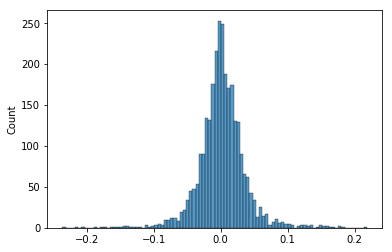

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(log_returns)


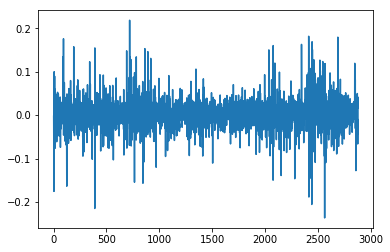

In [6]:
plt.plot(log_returns)

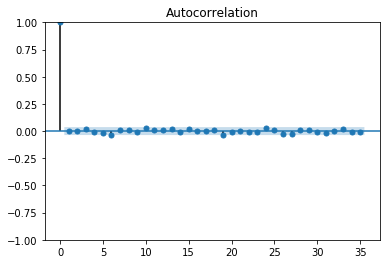

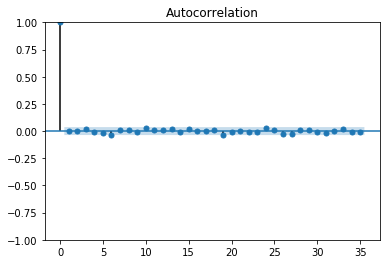

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(log_returns)

-0.0033820079914318457
5.882587462289621


c:\users\ashler herrick\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\ashler herrick\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\ashler herrick\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


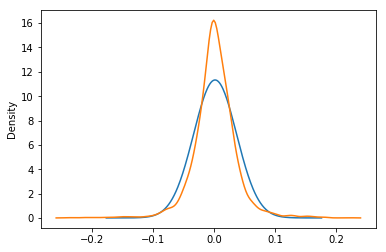

In [8]:
from scipy import stats
mu = np.mean(log_returns)
std = np.sqrt(np.var(log_returns))
skew = stats.skew(log_returns)
kurt = stats.kurtosis(log_returns)
x = np.arange(-5*std, 5*std, 0.001)
plt.plot(x, stats.norm.pdf(x,mu,std))
sns.kdeplot(log_returns)
print(skew)
print(kurt)

((array([-3.49114213, -3.24671701, -3.11151205, ...,  3.11151205,
          3.24671701,  3.49114213]),
  array([-0.23651792, -0.21477161, -0.20552227, ...,  0.17932717,
          0.18144503,  0.21829223])),
 (0.033865948318015066, 0.0018773141680358892, 0.9609570806180977))

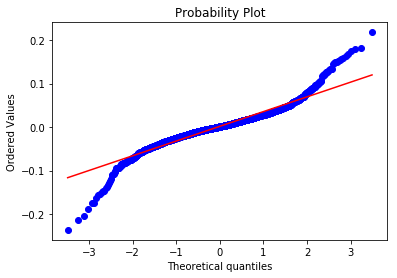

In [9]:
stats.probplot(log_returns, plot=plt)

In [10]:
from lifelines import KaplanMeierFitter 

In [11]:
abs_returns = np.absolute(log_returns)
kmf = KaplanMeierFitter()
kmf.fit(abs_returns)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 2882 total observations, 0 right-censored observations>

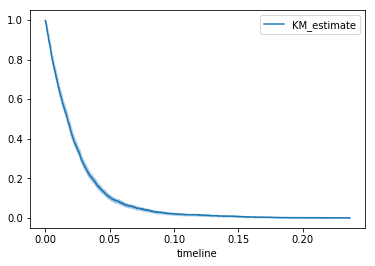

In [12]:
kmf.plot_survival_function()

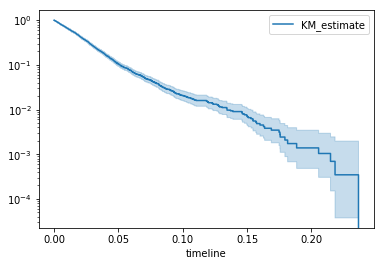

In [13]:
kmf.plot_survival_function()
plt.yscale('log')

In [14]:
fit_norm = stats.norm.fit(log_returns)
ad = stats.anderson(log_returns)
print(ad)
fit_t = stats.t.fit(log_returns)
fit_norm
cvm = stats.cramervonmises(log_returns, 't', args = (fit_t))
fit_laplace = stats.laplace.fit(log_returns)
print(cvm)
print(stats.cramervonmises(log_returns, 'laplace', args=(fit_laplace)))

AndersonResult(statistic=41.758209395438826, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
CramerVonMisesResult(statistic=0.09443751159227069, pvalue=0.6128707754290059)
CramerVonMisesResult(statistic=0.20901776308080755, pvalue=0.2506686172582947)


Text(0.5, 1.0, 'Geometric Brownian Motion')

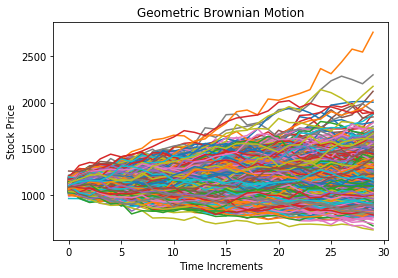

In [15]:
def geo_paths(S, mu, sigma, steps, N):

    r = stats.norm.rvs(loc = mu, scale = sigma,size = (steps,N))
    ST = S*np.exp(np.cumsum(r, axis=0))
    return ST

S = 1095 #stock price S_{0}
steps = 30 # time steps
N = 1000 # number of trials

norm_paths= geo_paths(S,mu,std,steps,N)

plt.plot(norm_paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")

Text(0.5, 1.0, 'Increments following a t Distribution')

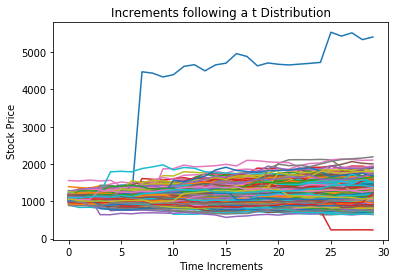

In [16]:
def geo_t_paths(S,df,loc,scale,steps,N):
    r = stats.t.rvs(df = df, loc = loc, scale = scale, size = (steps,N))
    ST = S*np.exp(np.cumsum(r, axis =0))
    
    return ST
t_paths = geo_t_paths(S,fit_t[0], fit_t[1], fit_t[2],steps, N)
plt.plot(t_paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Increments following a t Distribution")

In [17]:
S = 1095
fat_paths = geo_t_paths(S,fit_t[0], fit_t[1], fit_t[2],22, 500000)
norm_paths = geo_paths(S,mu,std,22,500000)
t_final_values = fat_paths[-1]
norm_final_values = norm_paths[-1]

In [18]:
t_mean = np.mean(t_final_values)
norm_mean = np.mean(norm_final_values)
print(t_mean)
print(norm_mean)

1153.6469671780303
1157.065687852178


In [19]:
t_var = np.var(t_final_values)
norm_var = np.var(norm_final_values)
print(t_var)
print(norm_var)

158882.36986668973
37091.986246801236


12.941297044475213


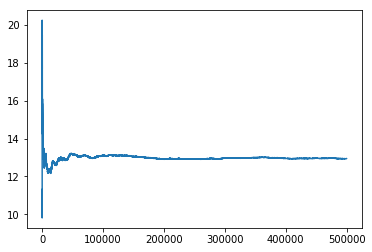

In [20]:
K = 1400
norm_mean_convergence = []
total = 0
for i in range(0,len(norm_final_values)):
    total = total + np.max([norm_final_values[i]-K,0])
    norm_mean_convergence.append(total/(i+1))
    
plt.plot(norm_mean_convergence[50:])
print(norm_mean_convergence[-1])

16.98381180226993


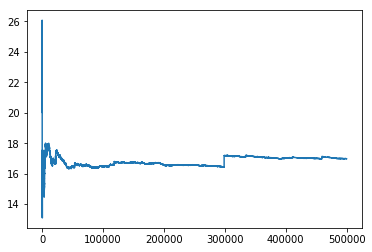

In [21]:
K = 1400
t_mean_convergence = []
total = 0
for i in range(0,len(t_final_values)):
    total = total + np.max([t_final_values[i]-K,0])
    t_mean_convergence.append(total/(i+1))
    
plt.plot(t_mean_convergence[50:])
print(t_mean_convergence[-1])


In [22]:
norm_option_values = [np.max([S-K,0]) for S in norm_final_values]
t_option_values = [np.max([S-K,0]) for S in t_final_values]

In [23]:
print(np.mean(norm_option_values))
print(np.var(norm_option_values))

12.941297044475064
2690.270966149247


In [24]:
print(np.mean(t_option_values))
print(np.var(t_option_values))

16.983811802269997
121172.45943320745


2.135460451531614
114660.40643888424


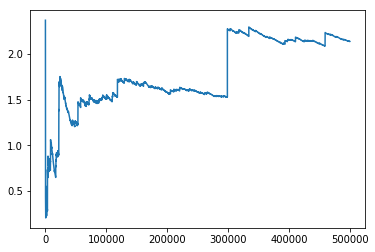

In [25]:
K = 2000
t_mean_convergence = []
total = 0
for i in range(0,len(t_final_values)):
    total = total + np.max([t_final_values[i]-K,0])
    t_mean_convergence.append(total/(i+1))
    
plt.plot(t_mean_convergence[50:])
t_option_values_2K = [np.max([S-K,0]) for S in t_final_values]
print(np.mean(t_option_values_2K))
print(np.var(t_option_values_2K))

In [26]:
S = 1095
K = 1400
fat_paths = geo_t_paths(S,fit_t[0], fit_t[1], fit_t[2],22, 500000)
t_final_prices = fat_paths[-1]
t_option_values = [np.max([S-K,0]) for S in t_final_prices]
print(np.mean(t_option_values))
print(np.var(t_option_values))


16.565407879532724
57967.906926062045


In [27]:
K = 2000
t_option_values_2K = [np.max([S-K,0]) for S in t_final_prices]
print(np.mean(t_option_values_2K))
print(np.var(t_option_values_2K))


1.998287085618277
51709.744336173535


In [28]:
def truncated_paths(S,df,loc,scale,steps,N, bounds):
    lb = bounds[0]
    ub = bounds[1]
    r = stats.t.rvs(df = df, loc = loc, scale = scale, size = int(steps*N))
    r = [lr for lr in r if lr < ub and lr > lb]
    while len(r) < steps*N:
        size = int(np.rint((steps*N-len(r))*1.2))
        t = stats.t.rvs(df = df, loc = loc, scale = scale, size = size)
        r = np.concatenate((r,t))
    r = r[:steps*N]
    r = np.reshape(r, (steps,N))   
     
    ST = S*np.exp(np.cumsum(r, axis =0))
    P = np.full(shape=N,fill_value=S)
    ST = np.concatenate(([P],ST), axis = 0)
    return ST

In [29]:
trunc_paths = truncated_paths(S,fit_t[0], fit_t[1], fit_t[2], 22, 100, bounds = (-1,.7))
print(trunc_paths.shape)

(23, 100)


Text(0.5, 1.0, 'Increments following a Truncated t Distribution')

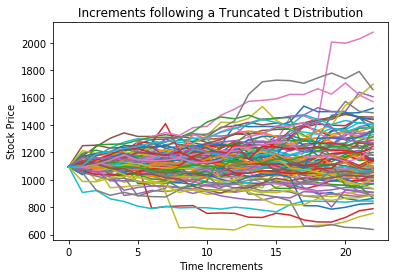

In [30]:
plt.plot(trunc_paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Increments following a Truncated t Distribution")

11.271218616343925
3168.79402460263


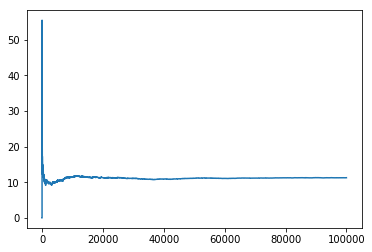

In [31]:
trunc_paths = truncated_paths(S,fit_t[0], fit_t[1], fit_t[2], 19, 100000, bounds = (-1,.7))
S_t = trunc_paths[-1]
K = 1400
S = 1014.07
option_values = [np.max([S-K,0]) for S in S_t]
conv = []
total = 0
for i in range(0,100000):
    total = total + option_values[i]
    conv.append(total/(i+1))
plt.plot(conv)
print(np.mean(option_values))
print(np.var(option_values))
    

In [32]:
put_option_values = [np.max([800-S,0]) for S in S_t]
print(np.mean(put_option_values))
print(np.var(put_option_values))

1.226734100690609
172.28282554378848


14.845331347209516


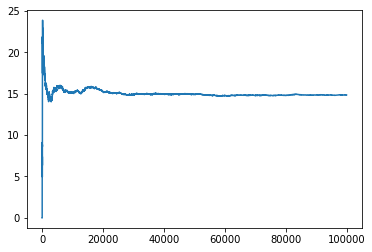

In [36]:
K = 1400
S = 1095
trunc_paths = truncated_paths(S,fit_t[0], fit_t[1], fit_t[2], 22, 100000, bounds = (-1,.7))
S_t = trunc_paths[-1]
option_values = [np.max([S-K,0]) for S in S_t]
conv = []
total = 0
for i in range(0,100000):
    total = total + option_values[i]
    conv.append(total/(i+1))
plt.plot(conv)
print(np.mean(option_values))
